<a href="https://colab.research.google.com/github/DeepuJose24/DJKeekarikattu/blob/main/IEEE_5_bus_system_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from matplotlib.pyplot import *


In [30]:
df=pd.read_csv("/content/DATA SET IEEE.csv")
df.head()

,S.No,Event,Time,BUS 1 VOLTAGE,BUS 2 VOLTAGE,BUS 3 VOLTAGE,BUS 4 VOLTAGE,BUS 5 VOLTAGE,BUS 1 CURRENT,BUS 2 CURRENT,...,LINE 2-5POWER,LINE 3-4POWER,LINE 4-5POWER,LINE 1-2POWER FACTOR,LINE 1-3POWER FACTOR,LINE2-3 POWER FACTOR,LINE2-4 POWER FACTOR,LINE2-5 POWER FACTOR,LINE 3-4POWER FACTOR,LINE 4-5POWER FACTOR
0,1,BASE CONDITION,2022-11-28T17:13:25+05:30,231.918793,225.509613,223.414215,222.304962,221.481979,6.064193,3.350329,...,673.419434,188.543716,21.058367,0.967646,0.981407,0.999999,0.992994,0.994233,0.999999,0.850401
1,2,BASE CONDITION,2022-11-28T17:13:40+05:30,231.877167,225.548096,223.360352,222.265640,221.543930,6.188186,3.110082,...,678.343994,187.388824,20.876949,0.957237,0.977702,0.999999,0.999999,0.995658,0.991783,0.845495
2,3,BASE CONDITION,2022-11-28T17:13:56+05:30,231.910339,225.604981,223.367752,222.251404,221.591126,6.246745,3.096839,...,678.407288,189.561569,21.607235,0.971058,0.979134,-0.994375,0.994954,0.997783,0.992237,0.849176
3,4,BASE CONDITION,2022-11-28T17:14:12+05:30,231.862030,225.582581,223.302490,222.183853,221.556213,6.358435,2.915368,...,677.986633,189.866135,21.694450,0.964530,0.975806,-0.997433,0.997835,0.998622,0.989172,0.860351
4,5,BASE CONDITION,2022-11-28T17:14:34+05:30,231.982269,225.708786,223.406616,222.256134,221.620071,6.246033,3.059899,...,678.112366,190.025940,21.817593,0.960091,0.981013,-0.998475,0.998864,0.998917,0.991070,0.866086


In [31]:
df.shape

(240, 63)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No                  240 non-null    int64  
 1   Event                 240 non-null    object 
 2   Time                  240 non-null    object 
 3   BUS 1 VOLTAGE         240 non-null    float64
 4   BUS 2 VOLTAGE         240 non-null    float64
 5   BUS 3 VOLTAGE         240 non-null    float64
 6   BUS 4 VOLTAGE         240 non-null    float64
 7   BUS 5 VOLTAGE         240 non-null    float64
 8   BUS 1 CURRENT         240 non-null    float64
 9   BUS 2 CURRENT         240 non-null    float64
 10  BUS 3 CURRENT         240 non-null    float64
 11  BUS 4 CURRENT         240 non-null    float64
 12  BUS 5 CURRENT         240 non-null    float64
 13  BUS 1 FREQUENCY       240 non-null    float64
 14  BUS 2 FREQUENCY       240 non-null    float64
 15  BUS 3 FREQUENCY       2

In [33]:
df.isnull().sum()

S.No                    0
Event                   0
Time                    0
BUS 1 VOLTAGE           0
BUS 2 VOLTAGE           0
                       ..
LINE2-3 POWER FACTOR    0
LINE2-4 POWER FACTOR    0
LINE2-5 POWER FACTOR    0
LINE 3-4POWER FACTOR    0
LINE 4-5POWER FACTOR    0
Length: 63, dtype: int64

In [34]:
df['Event '].value_counts()

RETURN TO BASE CONDITION                  39
SERIES COMPENSATION IN LINE 4-5 BY 1/8    12
REDUCTION OF DEMAND IN BUS 4 BY 250W      12
SERIES COMPENSATION IN LINE 2-4 BY 1/6    12
INCREASE DEMAND IN BUS 5 BY 250W          12
OUTAGE OF LINE 2-4                        12
INCREASE DEMAND IN BUS 4 BY 250W          12
 REDUCTION OF DEMAND IN BUS 3 BY 250W     12
REDUCTION OF DEMAND IN BUS 5 BY 250W      11
INCREASE DEMAND IN BUS 3 BY 250W          11
SERIES COMPENSATION IN LINE 2-3 BY 1/6    11
SERIES COMPENSATION IN LINE 1-3 BY 1/8    11
SERIES COMPENSATION IN LINE 2-5 BY 1/4    11
SHUNT CAPACITOR COMPENSATION IN BUS 3     11
SHUNT CAPACITOR COMPENSATION IN BUS 4     11
SHUNT REACTOR COMPENSATION IN BUS 5       11
INCREASE IN GENERATION BY 250W            11
OUTAGE OF LINE 2-3                        11
BASE CONDITION                             7
Name: Event , dtype: int64

In [35]:
def missing_values_table(data):
  m=data.isnull().sum()
  print(pd.DataFrame({'n_miss' : m[m!=0],'ratio' : m[m!=0]/len(data)}))

missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [37]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
# cat_cols, cat_but_car
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
  dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
  dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]
# num_cols
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]
  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f'num_cols: {len(num_cols)}')
  print(f'cat_but_car: {len(cat_but_car)}')
  print(f'num_but_cat: {len(num_but_cat)}')
  return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 240
Variables: 63
cat_cols: 1
num_cols: 61
cat_but_car: 1
num_but_cat: 0


In [39]:
def thresholds(col, data, d, u):
  q3=data[col].quantile(u)
  q1=data[col].quantile(d)
  down=q1-(q3-q1)*1.5
  up=q1+(q3-q1)*1.5
  return down, up
def check_outliers(col, data, d=0.25, u=0.75, plot=False):
  down, up = thresholds(col, data, d, u)
  ind = data[(data[col] < down) | (data[col] > up)].index
if plot:
  sns.boxplot(x=col, data=data)
  plt.show()
if len(ind)!= 0:
  print(f"\n Number of outliers for '{col}' : {len(ind)}")
  return col
for col in num_cols:
  check_outliers(col, df, 0.01, 0.99) # we set thresholds 0.01 and 0.99 !!


NameError: ignored

<Axes: xlabel='BUS 1 POWER', ylabel='BUS 1 FREQUENCY'>

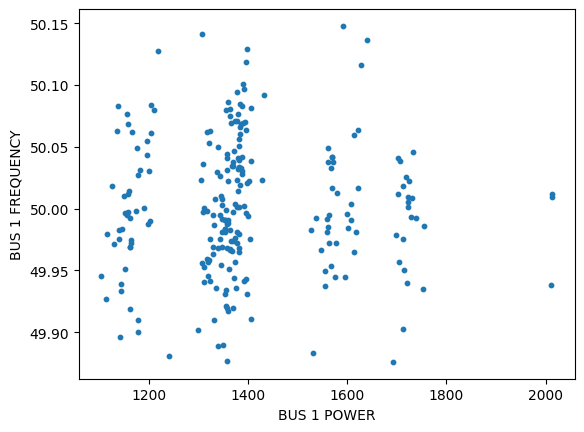

In [44]:
df.plot.scatter(x='BUS 1 POWER', y= 'BUS 1 FREQUENCY', s=10)

<Axes: xlabel='BUS 2 POWER', ylabel='BUS 2 FREQUENCY'>

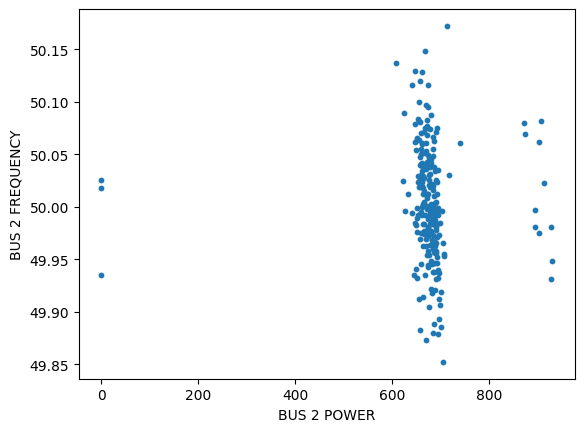

In [45]:
df.plot.scatter(x='BUS 2 POWER', y= 'BUS 2 FREQUENCY', s=10)

<Axes: xlabel='BUS 3 POWER', ylabel='BUS 3 FREQUENCY'>

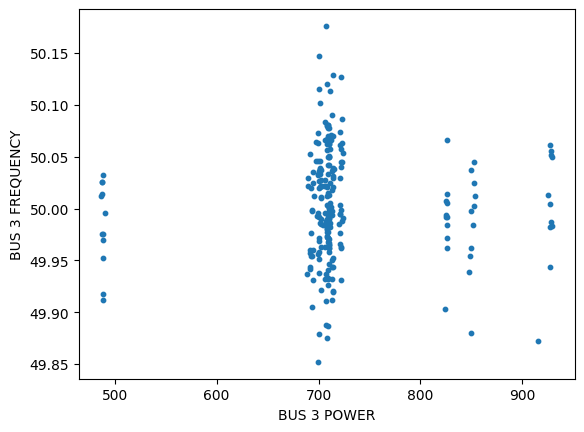

In [46]:
df.plot.scatter(x='BUS 3 POWER', y= 'BUS 3 FREQUENCY', s=10)

<Axes: xlabel='BUS 4 POWER', ylabel='BUS 4 FREQUENCY'>

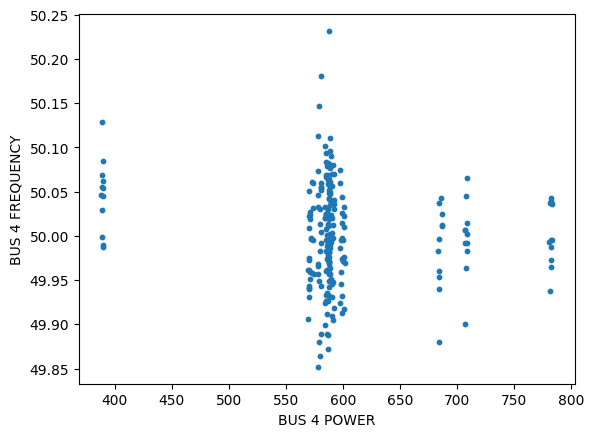

In [47]:
df.plot.scatter(x='BUS 4 POWER', y= 'BUS 4 FREQUENCY', s=10)

<Axes: xlabel='BUS 5 POWER', ylabel='BUS 5 FREQUENCY'>

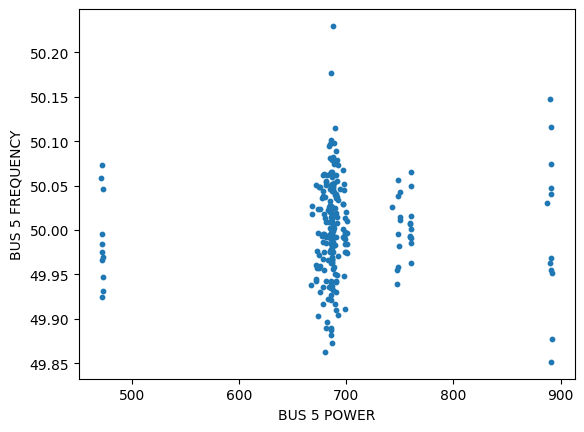

In [48]:
df.plot.scatter(x='BUS 5 POWER', y= 'BUS 5 FREQUENCY', s=10)